# testing SFH  and ZH implementation

* **2021/06/24**: modified lookback time binning to log-spaced

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from provabgs import util as UT
from provabgs import models as Models

In [3]:
m_nmf = Models.NMF(burst=False)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [4]:
thetas = np.array([
    np.array([0., 1., 0., 0., 0., 1e-3, 1e-3, 0, 0, 0]), 
    np.array([0., 0., 1., 0., 0., 1e-3, 1e-3, 0, 0, 0]), 
    np.array([0., 0., 0., 1., 0., 1e-3, 1e-3, 0, 0, 0]), 
    np.array([0., 0., 0., 0., 1., 1e-3, 1e-3, 0, 0, 0])
])

In [5]:
tedge, sfh = m_nmf.SFH(thetas, zred=0.1)

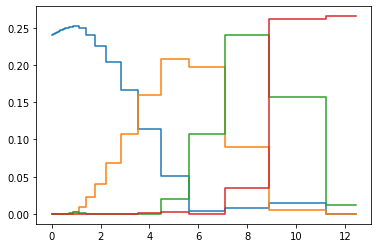

In [6]:
for i in range(4): 
    UT.betterstep(tedge, sfh[i])

In [7]:
m_nmf.avgSFR(thetas, zred=0.1, dt=1.)

array([0.24728744, 0.00028818, 0.00052857, 0.        ])

In [8]:
thetas = np.array([
    np.array([0., 1., 0., 0., 0., 1e-2, 1e-3, 0, 0, 0]), 
    np.array([0., 1., 0., 0., 0., 1e-3, 1e-3, 0, 0, 0]), 
    np.array([0., 1., 0., 0., 0., 1e-4, 1e-3, 0, 0, 0]), 
    np.array([0., 1., 0., 0., 0., 1e-5, 1e-3, 0, 0, 0])
])

In [9]:
tlb, zh = m_nmf.ZH(thetas, zred=0.1)

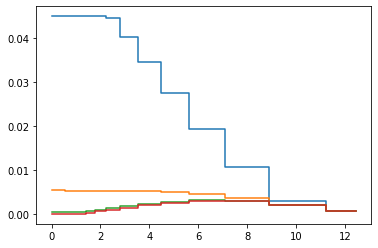

In [10]:
for i in range(4): 
    UT.betterstep(tlb, zh[i])

In [11]:
m_nmf.Z_MW(thetas, zred=0.1)

array([0.04013288, 0.00515148, 0.00128077, 0.0008937 ])

In [12]:
m_nmf = Models.NMF(burst=True)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [13]:
thetas = np.array([
    np.array([0., 1., 0., 0., 0., 0.1, 0.1, 1e-3, 1e-3, 0, 0, 0]), 
    np.array([0., 1., 0., 0., 0., 0.2, 0.2, 1e-3, 1e-3, 0, 0, 0]), 
    np.array([0., 1., 0., 0., 0., 0.3, 1., 1e-3, 1e-3, 0, 0, 0]), 
    np.array([0., 1., 0., 0., 0., 0.5, 5., 1e-3, 1e-3, 0, 0, 0])
])

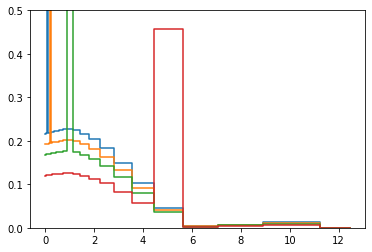

In [14]:
tedge, sfh = m_nmf.SFH(thetas, zred=0.1)
for i in range(4): 
    UT.betterstep(tedge, sfh[i])
    plt.ylim(0., 0.5)

In [15]:
m_nmf.avgSFR(thetas, zred=0.1, dt=1.)

array([0.3225587 , 0.39782995, 0.47310121, 0.24728744])